# NDEToolkit

A full Ultrasound analysis library

In [1]:
import NDEToolkit as ndt

## I/O functions

Set of methods and functions that provide an easy and efficient way to read .tiff files as numpy ndarrays and to write ndarrays as .tiff files

## napari_read_tiff

This function reads a tiff file given the path and returns an ndarray, we can specify if the path is a folder containing several tiff frames so it would be read as a volume

In [2]:
from pathlib import Path
import napari


In [5]:

folder_to_read = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

tiff_folder = folder_to_read /   r'c7_10MHz_backswall_freq_dom_pruebas'

data = ndt.napari_read_tiff(tiff_folder,folder=True)
data.shape

(221, 224, 1082)

In [6]:
viewer = napari.view_image(data)

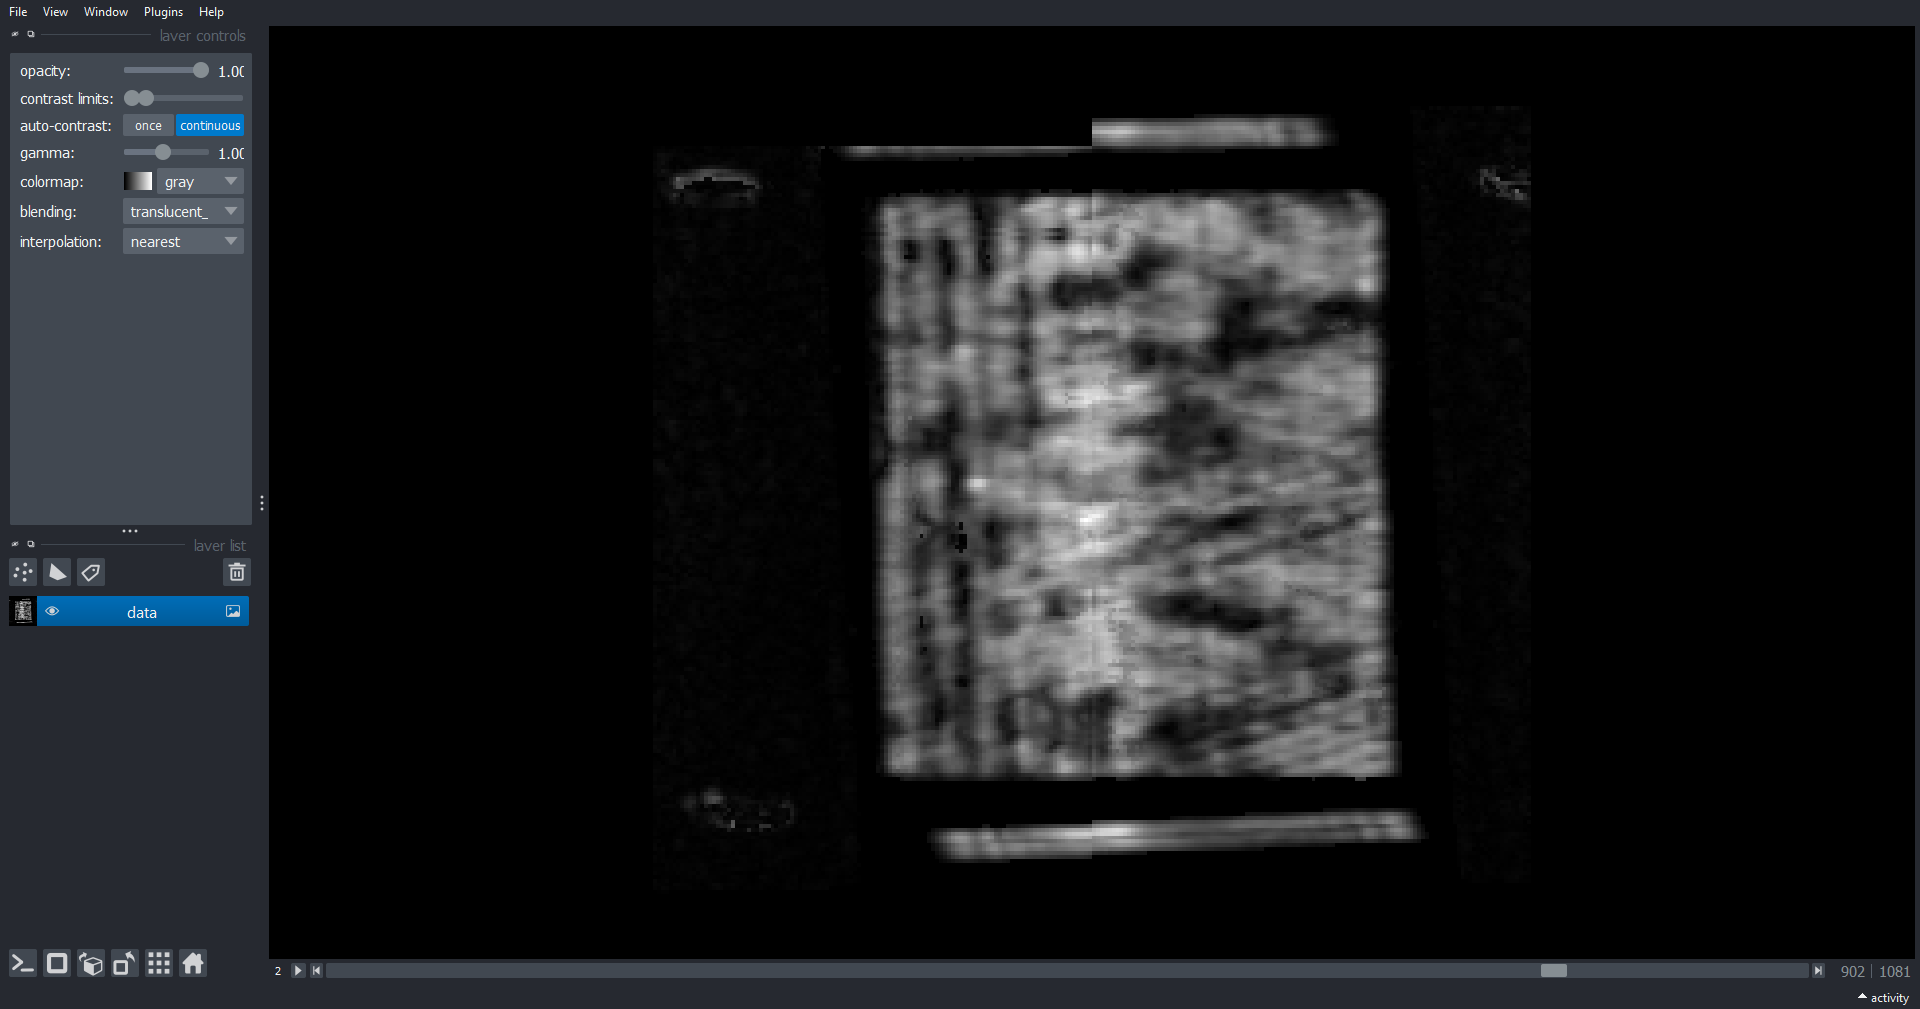

In [7]:
napari.utils.nbscreenshot(viewer)

## write_tiff

This functions writes a ndarray in a tiff file in the specified path

In [ ]:
from pathlib import Path

In [9]:
folder_to_write = Path(r'C:\Users\alberto.vicente\Documents\202211_LibreriaUltrasonidos\volumenes\Desarrollo libreria\temp')

filename = folder_to_read /   r'c7_10MHz_backswall_freq_dom_pruebas.tiff'

data = ndt.write_tiff(data,filename)

# RfAnalyze

# FFTAnalyze

# Aspect Ratio